In [1]:
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = pd.read_csv('/content/sample_data/covid19_india_final.csv')
z = pd.read_csv('/content/sample_data/covid19_india_final.csv', index_col=['Date'], parse_dates=['Date'], squeeze=True)

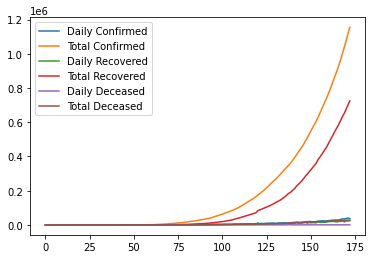

In [ ]:
x.drop("Unnamed: 0", axis = 1, inplace=True)
x.plot()

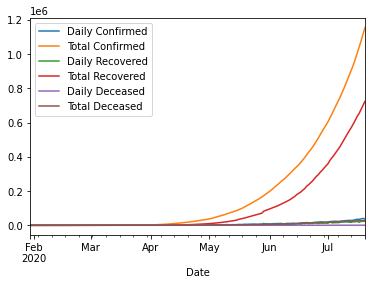

In [ ]:
z.drop("Unnamed: 0", axis = 1, inplace=True)
z.plot()

In [ ]:
df = x.groupby(['Date'])['Daily Confirmed', 'Daily Recovered','Daily Deceased',].sum().reset_index()

In [ ]:
#making columns for daily new cases
df['new_confirmed'] = df.confirmed.diff()
df['new_deaths'] = df.deaths.diff()
df['new_cured'] = df.cured.diff()


#taking dates from 15th March
df = df.iloc[44:]

In [ ]:
df.head()

,Date,Daily Confirmed,Daily Recovered,Daily Deceased
0,2020-01-30,1,0,0
1,2020-01-31,0,0,0
2,2020-02-01,0,0,0
3,2020-02-02,1,0,0
4,2020-02-03,1,0,0


In [ ]:
fig = go.Figure(go.Bar(x= df.Date, y= df['Daily Recovered'], name='Recovered'))
fig.add_trace(go.Bar(x=df.Date, y= df['Daily Deceased'], name='Deaths'))
fig.add_trace(go.Bar(x=df.Date, y= df['Daily Confirmed'], name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

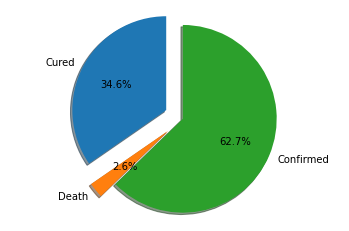

In [ ]:
labels=['Cured','Death','Confirmed']
values=[127259,9667,230599]
import matplotlib.pyplot as plt
explode=(0.20,0.20,0)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# **ETM Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [ ]:
result=seasonal_decompose(z['Daily Confirmed'],model='additive')

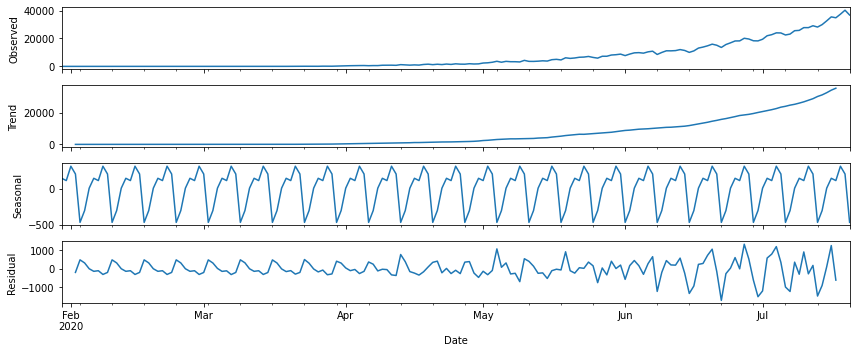

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
result.plot();

# Visualization of Indian Covid Cases

In [ ]:
date_wise_data = z.groupby(["Date"]).sum().reset_index()

In [ ]:
temp = date_wise_data.melt(id_vars="Date", value_vars=['Daily Recovered', 'Daily Deceased', 'Daily Confirmed'],var_name='Case', value_name='Count')
#temp.head()

cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801'
fig = px.area(temp, x="Date", y="Count", color='Case',title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.show()

# Analysis of Statewise data of India

In [ ]:
m = pd.read_csv('/content/sample_data/covid_19_states_final.csv')
n = pd.read_csv('/content/sample_data/covid_19_states_final.csv', index_col=['Datetime'], parse_dates=['Datetime'], squeeze=True)

In [ ]:
m.drop("Unnamed: 0", axis = 1, inplace=True)
m.head()

,Datetime,State,Confirmed,Cured,Deaths
0,2020-01-30 18:00:00,Kerala,1,0,0
1,2020-01-31 18:00:00,Kerala,1,0,0
2,2020-02-01 18:00:00,Kerala,2,0,0
3,2020-02-02 18:00:00,Kerala,3,0,0
4,2020-02-03 18:00:00,Kerala,3,0,0


In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Datetime   4251 non-null   object
 1   State      4251 non-null   object
 2   Confirmed  4251 non-null   int64 
 3   Cured      4251 non-null   int64 
 4   Deaths     4251 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 166.2+ KB


In [ ]:
n.drop("Unnamed: 0", axis = 1, inplace=True)
n.head()

,State,Confirmed,Cured,Deaths
Datetime,,,,
2020-01-30 18:00:00,Kerala,1,0,0
2020-01-31 18:00:00,Kerala,1,0,0
2020-02-01 18:00:00,Kerala,2,0,0
2020-02-02 18:00:00,Kerala,3,0,0
2020-02-03 18:00:00,Kerala,3,0,0


In [ ]:
# Creating a custom table for better understanding of the data 
state_details = pd.pivot_table(m, values=['Confirmed','Deaths','Cured'], index='State', aggfunc='max')
# Calculating the recovery rate which is Cured/Confirmed rounding to 2 digits
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],2)
# Similarly, for Death Rate
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)

state_details = state_details.sort_values(by='Confirmed', ascending= False).reset_index(level=0)

state_details.style.background_gradient(cmap='plasma_r')

,State,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
0,Maharashtra,292589,160357,11452,0.550000,0.040000
1,Tamil Nadu,160907,110807,2315,0.690000,0.010000
2,Delhi,120107,99301,3571,0.830000,0.030000
3,Karnataka,55115,20757,1147,0.380000,0.020000
4,Gujarat,46430,32973,2106,0.710000,0.050000
5,Uttar Pradesh,45163,27634,1084,0.610000,0.020000
6,Telangana,42496,28705,403,0.680000,0.010000
7,Andhra Pradesh,40646,20298,534,0.500000,0.010000
8,West Bengal,38011,22253,1049,0.590000,0.030000
9,Rajasthan,27789,20626,546,0.740000,0.020000


In [ ]:
state_details.rename(columns={'State':'State/UT'}, inplace=True)
state_details.head()

,State/UT,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
0,Maharashtra,292589,160357,11452,0.55,0.04
1,Tamil Nadu,160907,110807,2315,0.69,0.01
2,Delhi,120107,99301,3571,0.83,0.03
3,Karnataka,55115,20757,1147,0.38,0.02
4,Gujarat,46430,32973,2106,0.71,0.05


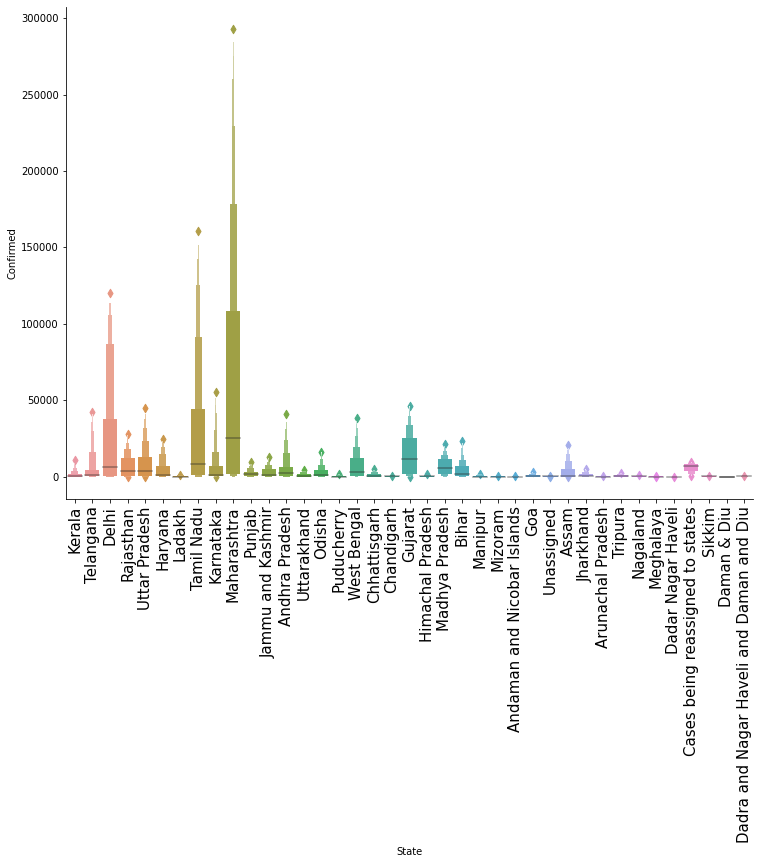

In [ ]:
g=sns.catplot(x='State',y='Confirmed',kind='boxen',data=m)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

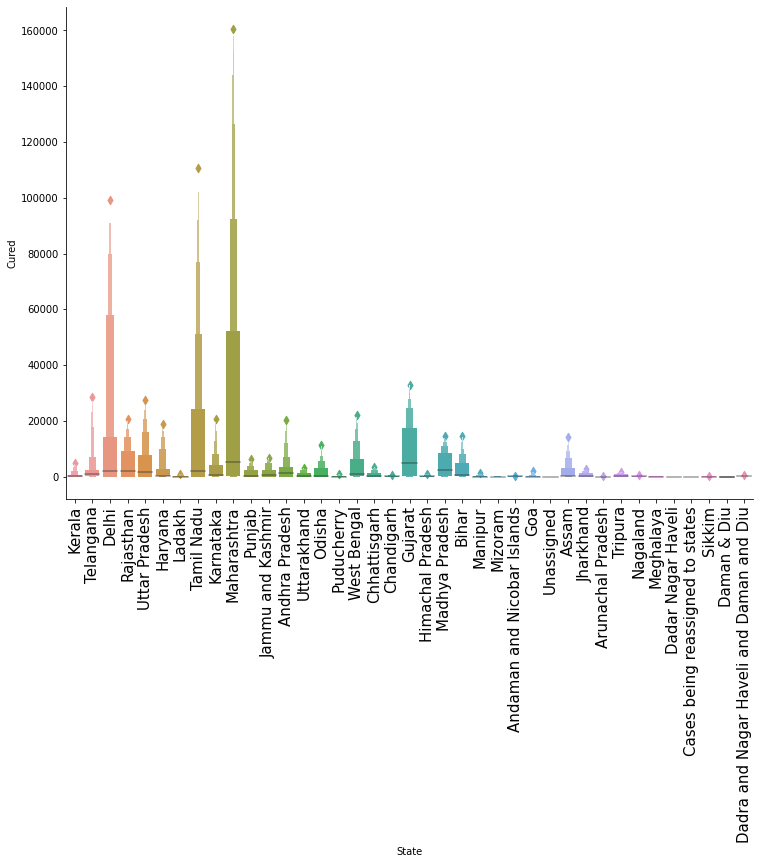

In [ ]:
g=sns.catplot(x='State',y='Cured',kind='boxen',data=m)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

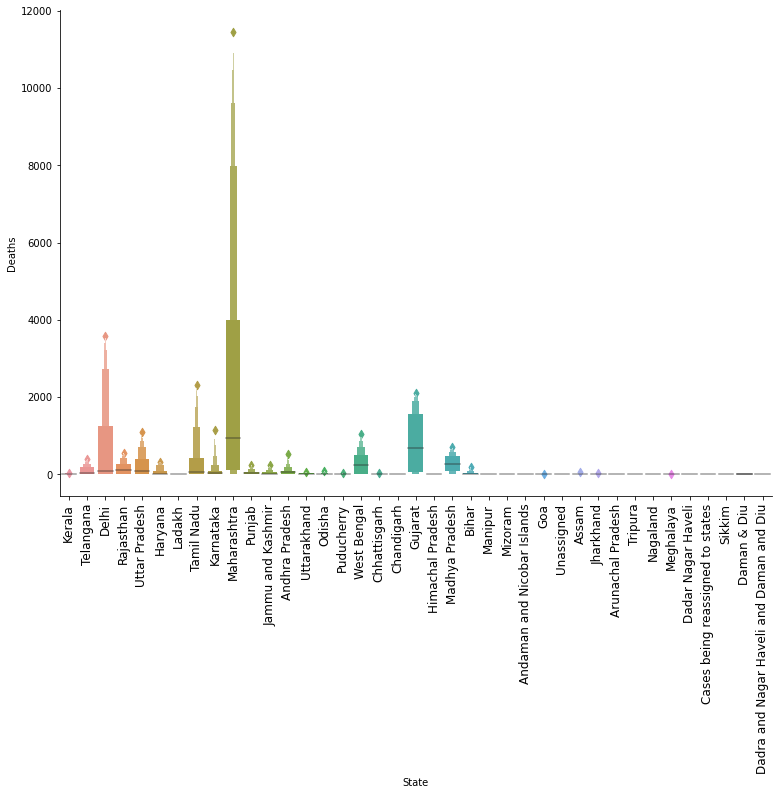

In [ ]:
g=sns.catplot(x='State',y='Deaths',kind='boxen',data=m)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=12)

In [ ]:
df = m[m.Confirmed > 0]
import plotly.express as px

fig = px.line(df, x="Datetime", y="Confirmed", color='State',template= "plotly_white")
fig.update_traces(mode='lines +markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.05, y= 1),
    title_text='<b>Daily New Confirmed Cases of Covid-19<b> ',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
    shapes=[
        # 1st highlight during Feb 4 - Feb 6
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        # 2nd highlight during Feb 20 - Feb 23
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()